In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
print(os.listdir(r"C:\Users\91912\Desktop\AI_Phase3"))

['database.csv']


In [ ]:
# Load your data

In [4]:
data = pd.read_csv(r"C:\Users\91912\Desktop\AI_Phase3/database.csv")
data.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01-02-1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01-04-1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01-05-1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01-08-1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01-09-1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [5]:
data.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')

In [ ]:
# Select relevant columns

In [6]:
data = data[['Date', 'Time', 'Latitude', 'Longitude', 'Depth', 'Magnitude']]
data.head()

,Date,Time,Latitude,Longitude,Depth,Magnitude
0,01-02-1965,13:44:18,19.246,145.616,131.6,6.0
1,01-04-1965,11:29:49,1.863,127.352,80.0,5.8
2,01-05-1965,18:05:58,-20.579,-173.972,20.0,6.2
3,01-08-1965,18:49:43,-59.076,-23.557,15.0,5.8
4,01-09-1965,13:32:50,11.938,126.427,15.0,5.8


In [ ]:
# Convert date and time to timestamp

In [11]:
import datetime

timestamp = []

for d, t in zip(data['Date'], data['Time']):
    try:
        dt = datetime.datetime.strptime(d+' '+t, '%m/%d/%Y %H:%M:%S')
        timestamp.append(dt)
    except ValueError:
        timestamp.append('ValueError')

timeStamp = pd.Series(timestamp)
data['Timestamp'] = timeStamp.values
final_data = data.drop(['Date', 'Time'], axis=1)
final_data = final_data[final_data.Timestamp != 'ValueError']
final_data.head()

,Latitude,Longitude,Depth,Magnitude,Timestamp
7,-13.309,166.212,35.0,6.0,1965-01-15 23:17:42
8,-56.452,-27.043,95.0,6.0,1965-01-16 11:32:37
9,-24.563,178.487,565.0,5.8,1965-01-17 10:43:17
10,-6.807,108.988,227.9,5.9,1965-01-17 20:57:41
11,-2.608,125.952,20.0,8.2,1965-01-24 00:11:17


In [ ]:
# Intialize Basemap

In [13]:
!pip install basemap

  Obtaining dependency information for basemap from https://files.pythonhosted.org/packages/c9/fb/0aa18cea5d108ebd35e51348ff4269b6cef10660c537e29a7ae596c5fb0b/basemap-1.3.8-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/30.5 MB ? eta -:--:--
     ---------------------------------------- 0.1/30.5 MB 8.9 MB/s eta 0:00:04
     ---------------------------------------- 0.2/30.5 MB 2.1 MB/s eta 0:00:15
     ---------------------------------------- 0.3/30.5 MB 1.6 MB/s eta 0:00:20
     ---------------------------------------- 0.3/30.5 MB 1.5 MB/s eta 0:00:21
      --------------------------------------- 0.4/30.5 MB 1.5 MB/s eta 0:00:20
      --------------------------------------- 0.5/30.5 MB 1.4 MB/s eta 0:00:22
      --------------------------------------- 0.6/30.5 MB 1.5 MB/s eta 0:00:21
      --------------------------------------- 0.7/30.5 MB 1.4 MB/s eta 0:00:21
      --------------------------------------- 0.7/30.5 MB 1.4 MB/s eta 0:00:21
     - --

In [ ]:
# Get coordinates

In [ ]:
# Create the map

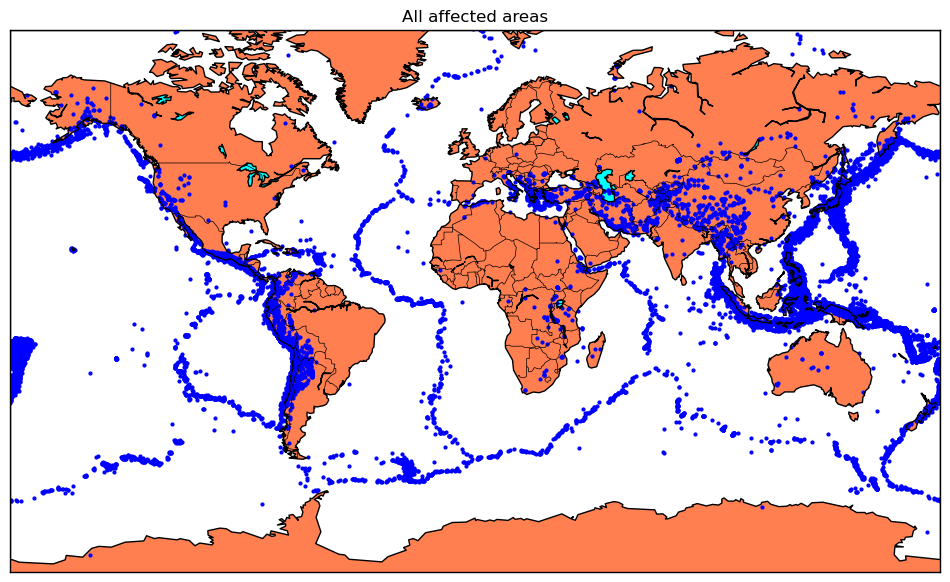

In [16]:
from mpl_toolkits.basemap import Basemap

m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')

longitudes = data["Longitude"].tolist()
latitudes = data["Latitude"].tolist()
x,y = m(longitudes,latitudes)

fig = plt.figure(figsize=(12,10))
plt.title("All affected areas")
m.plot(x, y, "o", markersize = 2, color = 'blue')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary()
m.drawcountries()
plt.show()